# Empirical vs Theoretical Distributions in 1D

This notebook illustrates basic probability concepts from **Chapter 5**:

- Random variables and sampling notation `X ~ P`
- Probability mass / density functions (PMF / PDF)
- Cumulative distribution functions (CDF)
- Expectation and the Law of Large Numbers

We compare empirical quantities (computed from samples) with their
theoretical counterparts for three fundamental distributions:

- Bernoulli(rho)
- Poisson(lambda)
- Gaussian N(mu, sigma^2)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os

rng = np.random.default_rng(12345)

os.makedirs("figs", exist_ok=True)

## 1. Bernoulli distribution

We start with a simple discrete random variable `X ~ Bernoulli(rho)`,
taking values in `{0, 1}` with

- P(X = 1) = rho  
- P(X = 0) = 1 - rho

The theoretical mean and variance are

- E[X] = rho  
- Var(X) = rho (1 - rho)

In [2]:
def bernoulli_sample(rho, size):
    return rng.random(size) < rho

def bernoulli_pmf(rho):
    xs = np.array([0, 1])
    ps = np.array([1 - rho, rho])
    return xs, ps

def bernoulli_cdf(rho):
    xs = np.array([0, 1])
    cdf_vals = np.array([1 - rho, 1.0])
    return xs, cdf_vals

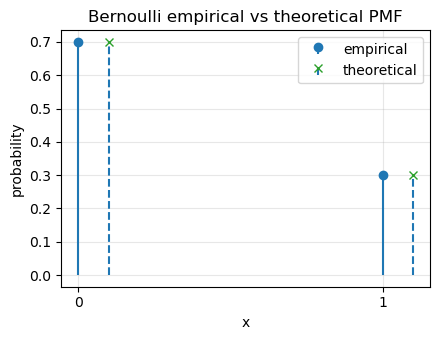

In [3]:
rho = 0.3
N = 2000

samples = bernoulli_sample(rho, N).astype(int)

values, counts = np.unique(samples, return_counts=True)
emp_pmf = counts / counts.sum()

xs_th, ps_th = bernoulli_pmf(rho)

plt.figure(figsize=(4.5, 3.5))
plt.stem(values, emp_pmf, linefmt="-", markerfmt="o", basefmt=" ")
plt.stem(xs_th + 0.1, ps_th, linefmt="--", markerfmt="x", basefmt=" ")
plt.xticks([0, 1])
plt.xlabel("x")
plt.ylabel("probability")
plt.title("Bernoulli empirical vs theoretical PMF")
plt.legend(["empirical", "theoretical"])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figs/bern_pmf_emp_vs_theory.png", dpi=300, bbox_inches="tight")
plt.show()

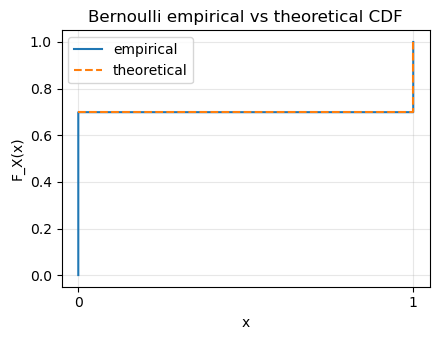

In [4]:
sorted_samples = np.sort(samples)
cdf_emp = np.arange(1, N + 1) / N

xs_cdf_th, cdf_th = bernoulli_cdf(rho)

plt.figure(figsize=(4.5, 3.5))
plt.step(sorted_samples, cdf_emp, where="post", label="empirical")
plt.step(xs_cdf_th, cdf_th, where="post", linestyle="--", label="theoretical")
plt.xticks([0, 1])
plt.xlabel("x")
plt.ylabel("F_X(x)")
plt.title("Bernoulli empirical vs theoretical CDF")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/bern_cdf_emp_vs_theory.png", dpi=300, bbox_inches="tight")
plt.show()

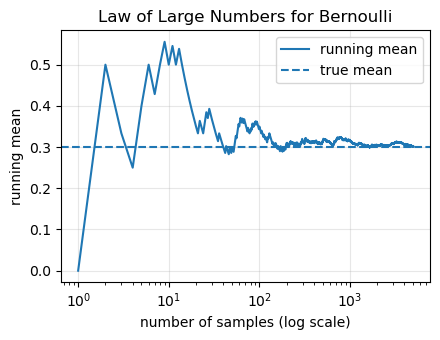

In [5]:
N_max = 5000
samples_lln = bernoulli_sample(rho, N_max).astype(float)
running_mean = np.cumsum(samples_lln) / np.arange(1, N_max + 1)

plt.figure(figsize=(4.5, 3.5))
plt.plot(np.arange(1, N_max + 1), running_mean, label="running mean")
plt.axhline(rho, linestyle="--", label="true mean")
plt.xscale("log")
plt.xlabel("number of samples (log scale)")
plt.ylabel("running mean")
plt.title("Law of Large Numbers for Bernoulli")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/bern_lln_running_mean.png", dpi=300, bbox_inches="tight")
plt.show()

## 2. Poisson distribution

Now consider a Poisson random variable `X ~ Poisson(lambda)`,
with support `{0, 1, 2, ...}` and

P(X = k) = lambda^k e^{-lambda} / k!  (for k >= 0)

Theoretical mean and variance:  E[X] = lambda,  Var(X) = lambda.

In [6]:
def poisson_sample(lam, size):
    return rng.poisson(lam, size)

def poisson_pmf(k_max, lam):
    ks = np.arange(0, k_max + 1)
    ps = np.exp(-lam) * np.power(lam, ks) / np.array([math.factorial(k) for k in ks])
    return ks, ps

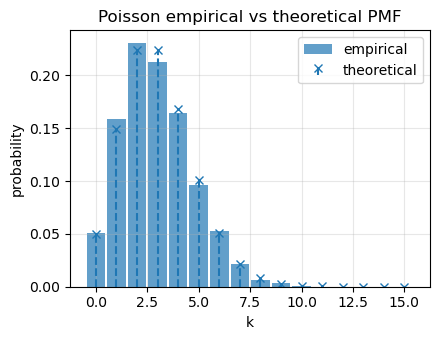

In [7]:
lam = 3.0
N = 5000
samples_pois = poisson_sample(lam, N)

k_max = max(15, samples_pois.max())
ks_th, ps_th = poisson_pmf(k_max, lam)

hist_counts, bin_edges = np.histogram(samples_pois, bins=np.arange(-0.5, k_max + 1.5, 1), density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(4.5, 3.5))
plt.bar(bin_centers, hist_counts, width=0.9, alpha=0.7, label="empirical")
plt.stem(ks_th, ps_th, linefmt="--", markerfmt="x", basefmt=" ", label="theoretical")
plt.xlabel("k")
plt.ylabel("probability")
plt.title("Poisson empirical vs theoretical PMF")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/pois_pmf_emp_vs_theory.png", dpi=300, bbox_inches="tight")
plt.show()

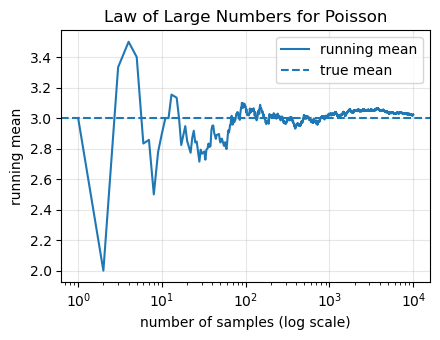

In [8]:
N_max = 10000
samples_pois_lln = poisson_sample(lam, N_max).astype(float)
running_mean_pois = np.cumsum(samples_pois_lln) / np.arange(1, N_max + 1)

plt.figure(figsize=(4.5, 3.5))
plt.plot(np.arange(1, N_max + 1), running_mean_pois, label="running mean")
plt.axhline(lam, linestyle="--", label="true mean")
plt.xscale("log")
plt.xlabel("number of samples (log scale)")
plt.ylabel("running mean")
plt.title("Law of Large Numbers for Poisson")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/pois_lln_running_mean.png", dpi=300, bbox_inches="tight")
plt.show()

## 3. Gaussian (normal) distribution

Finally, we illustrate a continuous random variable `X ~ N(mu, sigma^2)`.

In [9]:
from math import erf, sqrt

def normal_sample(mu, sigma, size):
    return rng.normal(mu, sigma, size)

def normal_pdf(x, mu, sigma):
    return (1.0 / (math.sqrt(2 * math.pi) * sigma)
            * np.exp(-0.5 * ((x - mu) / sigma) ** 2))

def normal_cdf(x, mu, sigma):
    # Vectorized CDF using math.erf
    x = np.asarray(x)
    z = (x - mu) / (sigma * math.sqrt(2.0))
    erf_vec = np.vectorize(erf)
    return 0.5 * (1.0 + erf_vec(z))

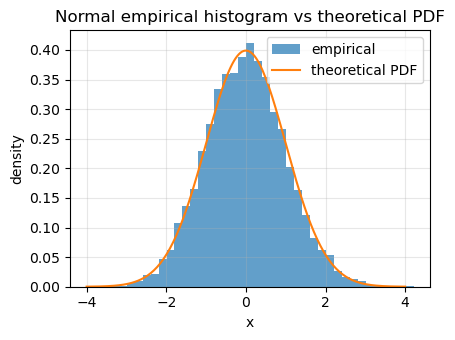

In [10]:
mu = 0.0
sigma = 1.0
N = 5000

samples_norm = normal_sample(mu, sigma, N)

xs = np.linspace(-4, 4, 200)
pdf_vals = normal_pdf(xs, mu, sigma)

plt.figure(figsize=(4.5, 3.5))
plt.hist(samples_norm, bins=40, density=True, alpha=0.7, label="empirical")
plt.plot(xs, pdf_vals, label="theoretical PDF")
plt.xlabel("x")
plt.ylabel("density")
plt.title("Normal empirical histogram vs theoretical PDF")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/norm_hist_vs_pdf.png", dpi=300, bbox_inches="tight")
plt.show()

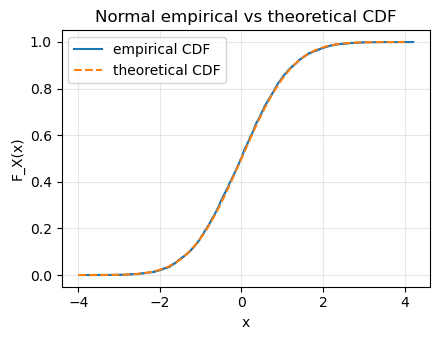

In [11]:
sorted_norm = np.sort(samples_norm)
cdf_emp_norm = np.arange(1, N + 1) / N
xs_cdf = np.linspace(-4, 4, 200)
cdf_th_vals = normal_cdf(xs_cdf, mu, sigma)

plt.figure(figsize=(4.5, 3.5))
plt.step(sorted_norm, cdf_emp_norm, where="post", label="empirical CDF")
plt.plot(xs_cdf, cdf_th_vals, linestyle="--", label="theoretical CDF")
plt.xlabel("x")
plt.ylabel("F_X(x)")
plt.title("Normal empirical vs theoretical CDF")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/norm_cdf_emp_vs_theory.png", dpi=300, bbox_inches="tight")
plt.show()

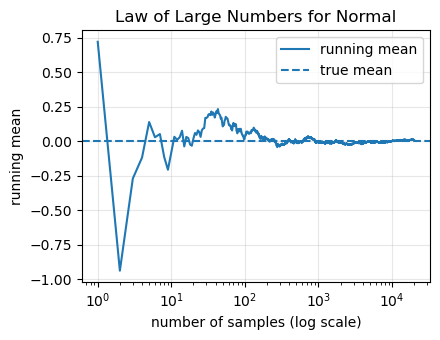

In [12]:
N_max = 20000
samples_norm_lln = normal_sample(mu, sigma, N_max)
running_mean_norm = np.cumsum(samples_norm_lln) / np.arange(1, N_max + 1)

plt.figure(figsize=(4.5, 3.5))
plt.plot(np.arange(1, N_max + 1), running_mean_norm, label="running mean")
plt.axhline(mu, linestyle="--", label="true mean")
plt.xscale("log")
plt.xlabel("number of samples (log scale)")
plt.ylabel("running mean")
plt.title("Law of Large Numbers for Normal")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/norm_lln_running_mean.png", dpi=300, bbox_inches="tight")
plt.show()

## 4. Discussion

This notebook illustrates how empirical quantities converge to their
theoretical counterparts as the number of samples grows, providing a
computational counterpart to the formal definitions in the text.

You can connect each plot to the corresponding concepts in the chapter:

- PMF / PDF vs empirical histograms
- CDF vs empirical cumulative distributions
- Law of Large Numbers via running means.